<a href="https://colab.research.google.com/github/MinaAlberDS/Codveda-Internship/blob/master/Level%201/Task%202/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning

### Prepare the Notebook

In [200]:
# Import needed libraries

import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# load the collected data
re_df = pd.read_csv(r"D:\Data science project\Data science\Codveda-internship\Level 1\Task 1\real_estates_data(new).csv")

# Preview the data
print("The Real Estates data")
re_df

The Real Estates data


,name,price,property_type,bedrooms,bathrooms,sqm,year_built,features,city,governorate,address,description
0,Alamain (Latin District),"6,594,000 EGP","Residential, Apartment",1,0,92.86,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...
1,Beachfront Tower - B1,"66,104,000 EGP","Residential, Apartment",3,3,398.00,2025,['Other'],Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...
2,PODIA,"12,824,000 EGP","Commercial, Office",0,0,93.00,2025,"['Other', '24 Hour Security', 'Fire Alarm', 'G...",Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...
3,Mazarine Apartment,"12,857,000 EGP","Residential, Apartment",3,3,252.00,2025,"['24 Hour Security', 'Electricity Available']",Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...
4,Alamain (Latin District),"8,721,000 EGP","Residential, Apartment",3,0,209.42,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...
...,...,...,...,...,...,...,...,...,...,...,...,...
1178,T- Residences,"2,668,259 EGP","Residential, Apartment",3,1,120.00,2024,"['24 Hour Security', 'Electricity Available', ...",North Coast,Matrouh,Building C-12 Floor 6 Unit 62 T- Residences No...,"""Torec Developments is a subsidiary of the New..."
1179,Alamain (Latin District),"3,226,000 EGP","Residential, Apartment",1,0,94.61,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building D15 Floor 7 Unit Z02-CL07-D15-X7-07-0...,Latini by Saudi Egyptian Developers (SED) – Ne...
1180,Downtown commercial,"20,540,000 EGP","Commercial, Retail",0,0,200.00,2025,"['Other', '24 Hour Security', 'Electricity Ava...",Mersa Matruh,Matrouh,Building DT01 Floor Ground floor Unit DTRG0130...,Designed to be an integrated residential and c...
1181,Alamain (Latin District),"6,512,000 EGP","Residential, Apartment",4,0,213.53,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building C06 Floor 1 Unit Z05-CL11-C06-M7-01-0...,Latini by Saudi Egyptian Developers (SED) – Ne...


### Remove Duplicates

In [201]:
def duplicates_sum(data:pd.DataFrame):
    """Return duplicated rows and print the count and percentage of duplicates in the DataFrame."""
    
    duplicates = data.duplicated() # the duplicated rows
    # print the count of duplicates in the data
    print(f"The sum of duplicates: {duplicates.sum()} row, which is {(duplicates.sum() / data.shape[0])* 100:.2f} % of the data")
    return duplicates[duplicates == True]

duplicates = duplicates_sum(re_df)

# Drop This duplicates
re_df.drop(duplicates.index, inplace=True)
print("The duplicates has been removed.")

# See the sum of the duplicates again

duplicates = duplicates_sum(re_df)

The sum of duplicates: 240 row, which is 20.29 % of the data
The duplicates has been removed.
The sum of duplicates: 0 row, which is 0.00 % of the data


### Handling missing values

In [202]:
### print the sum of NaN values
print(f"The sum of the Null values: {re_df.isnull().sum().sum()}")

The sum of the Null values: 0


In [203]:
### See the unique values of the columns to check the Null value, and the formats
for column in re_df.drop(["description", "address"], axis =1).columns:
    unique_values = re_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'name': ['Alamain (Latin District)' 'Beachfront Tower - B1' 'PODIA'
 'Mazarine Apartment' 'Latin City' 'Downtown commercial'
 'Downtown Extension' 'Zahya' 'Al Fustat' 'Jade Park' 'AlMaqsad Park'
 'Central' 'Mazarine Commercial' 'New Garden City' 'Mamsha Avenue'
 'BEGONIA' 'Maspero Business Tower Nile Heights' 'Marina 8 By The Lake'
 'Blu Vert' 'Mazarine' 'Maspero mall' 'Downtown' 'VALORY'
 'Maspero Heights – Commercial  for Sale' 'T- Residences'
 'Podia Plaza – Commercial for Sale' 'T-Residences' 'AXLE'
 'AlMaqsad Residences']
Unique values in column 'price': ['6,594,000 EGP' '66,104,000 EGP' '12,824,000 EGP' '12,857,000 EGP'
 '8,721,000 EGP' '6,688,000 EGP' '32,696,000 EGP' '28,507,000 EGP'
 '36,428,000 EGP' '8,368,000 EGP' '4,121,000 EGP' '10,837,000 EGP'
 '66,602,000 EGP' '4,172,000 EGP' '17,611,000 EGP' '9,942,000 EGP'
 '4,851,000 EGP' '9,399,000 EGP' '34,326,000 EGP' '8,648,000 EGP'
 '15,755,000 EGP' '3,170,000 EGP' '34,518,000 EGP' '14,253,000 EGP'
 '4,303

There isn't any Null value in the data

### Handling the formating

> Reformat the price format to be *int*

#### Reformat the price fomrate

In [204]:
### first I want to check if there are decimals in the prices or not
contain_decimals = re_df[re_df["price"].str.contains(r"\.")].sum().sum() # the sum of prices that contain decimals
print(f"Sum of prices that contain decimals: {contain_decimals:.0f}")

Sum of prices that contain decimals: 0


So Steps:
- [x] Remove EGP, and it on the column name(Price (EGP))
- [x] Remove "," from the prices values

In [205]:
re_df["Price(EGP)"] = re_df["price"].str.replace("EGP", "", regex=True).str.replace(",","", regex=True).astype(int) # remove EGP, and "," from the values. Convert it to int
# remove the old column
re_df.drop("price", axis =1, inplace=True)
print(f"Price dtype after reformating: {re_df["Price(EGP)"].dtype}")
re_df

Price dtype after reformating: int64


,name,property_type,bedrooms,bathrooms,sqm,year_built,features,city,governorate,address,description,Price(EGP)
0,Alamain (Latin District),"Residential, Apartment",1,0,92.86,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000
1,Beachfront Tower - B1,"Residential, Apartment",3,3,398.00,2025,['Other'],Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000
2,PODIA,"Commercial, Office",0,0,93.00,2025,"['Other', '24 Hour Security', 'Fire Alarm', 'G...",Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000
3,Mazarine Apartment,"Residential, Apartment",3,3,252.00,2025,"['24 Hour Security', 'Electricity Available']",Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000
4,Alamain (Latin District),"Residential, Apartment",3,0,209.42,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000
...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Alamain (Latin District),"Residential, Apartment",3,0,177.47,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building A04 Floor G Unit Z05-CL06-A04-M4-00-0...,One of the main districts in this new city nei...,5678000
1101,Jade Park,"Residential, Duplex",4,2,692.00,2025,"['Lobby', 'Secured Garage/Parking', 'Water Ava...",New Administrative Capital,Cairo,Building 1L Floor 6th floor Unit JP1L61 Jade P...,"Welcome to Al Maqsad, your future destination ...",25292000
1102,Mamsha Avenue,"Residential, Apartment",3,0,171.00,2025,"['Other', '24 Hour Security', 'Electricity Ava...",New Administrative Capital,Cairo,Building MAA15B Floor 4 Unit MAA15B43 Mamsha A...,Mamsha Avenue is the premier residence created...,6137000
1103,Alamain (Latin District),"Residential, Apartment",3,0,207.58,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building A06 Floor 4 Unit Z05-CL08-A06-M4-04-0...,Latini by Saudi Egyptian Developers (SED) – Ne...,5933000


#### Fix the features list format 

In [206]:
### fix string representation of a list problem in the features data
import ast
re_df["features"] = re_df["features"].apply(ast.literal_eval) # Fix the problem

In [207]:
re_df["features"]

0           [Other, Security Gate, Electricity Available]
1                                                 [Other]
2       [Other, 24 Hour Security, Fire Alarm, Gate Com...
3               [24 Hour Security, Electricity Available]
4           [Other, Security Gate, Electricity Available]
                              ...                        
1099        [Other, Security Gate, Electricity Available]
1101     [Lobby, Secured Garage/Parking, Water Available]
1102     [Other, 24 Hour Security, Electricity Available]
1103        [Other, Security Gate, Electricity Available]
1104    [Other, 24 Hour Security, Fire Alarm, Gate Com...
Name: features, Length: 943, dtype: object

## Feature Engineering


### separate Property category from sub type

In [208]:
### separate the property type from the real estate type to Property category, and Property sub type
re_df[["property_category", "property_subType"]] = re_df["property_type"].str.split(",", expand=True) # Split the after comma from the before it to two columns
re_df["property_subType"] = re_df["property_subType"].str.strip() # remove the beigning space
# Remove the old column
re_df.drop("property_type", axis = 1, inplace=True)

re_df.head()

,name,bedrooms,bathrooms,sqm,year_built,features,city,governorate,address,description,Price(EGP),property_category,property_subType
0,Alamain (Latin District),1,0,92.86,2025,"[Other, Security Gate, Electricity Available]",North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment
1,Beachfront Tower - B1,3,3,398.00,2025,[Other],Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment
2,PODIA,0,0,93.00,2025,"[Other, 24 Hour Security, Fire Alarm, Gate Com...",Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office
3,Mazarine Apartment,3,3,252.00,2025,"[24 Hour Security, Electricity Available]",Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment
4,Alamain (Latin District),3,0,209.42,2025,"[Other, Security Gate, Electricity Available]",North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment


In [209]:
re_df["property_subType"].unique()

array(['Apartment', 'Office', 'Retail', 'Twinhouse', 'Villa', 'Townhouse',
       'Duplex', 'Penthouse', 'property.Types.CABANA',
       'Retail Building/Mall', 'Medical Facility'], dtype=object)

Combine some of them to reduce the dummy variables

In [210]:
re_df["property_subType"].replace(["Twinhouse", "Townhouse"], "Residential - Attached Houses", inplace=True) 
re_df["property_subType"].replace(["Apartment", "Penthouse", "Duplex"], "Apartment (Residential - Multi-Story Units)", inplace=True) 
re_df["property_subType"].replace(["Retail", 'Retail Building/Mall'], "Retail", inplace=True) 
re_df["property_subType"].replace("property.Types.CABANA", "Cabana", inplace=True) 
re_df["property_subType"].replace("Office", "Office (Commercial - Professional)")

re_df["property_subType"].unique()

C:\Users\minaa\AppData\Local\Temp\ipykernel_24988\3733764033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  re_df["property_subType"].replace(["Twinhouse", "Townhouse"], "Residential - Attached Houses", inplace=True)


array(['Apartment (Residential - Multi-Story Units)', 'Office', 'Retail',
       'Residential - Attached Houses', 'Villa', 'Cabana',
       'Medical Facility'], dtype=object)

### Create price per Sqm where Sqm → $m^2$

In [211]:
re_df["Price/Sqm"] = round(re_df["Price(EGP)"] / re_df["sqm"], 4) # Create the column, with 4 decimals
print("Preview the data after creating Price/Sqm column")
re_df.head()

Preview the data after creating Price/Sqm column


,name,bedrooms,bathrooms,sqm,year_built,features,city,governorate,address,description,Price(EGP),property_category,property_subType,Price/Sqm
0,Alamain (Latin District),1,0,92.86,2025,"[Other, Security Gate, Electricity Available]",North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228
1,Beachfront Tower - B1,3,3,398.00,2025,[Other],Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523
2,PODIA,0,0,93.00,2025,"[Other, 24 Hour Security, Fire Alarm, Gate Com...",Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office,137892.4731
3,Mazarine Apartment,3,3,252.00,2025,"[24 Hour Security, Electricity Available]",Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413
4,Alamain (Latin District),3,0,209.42,2025,"[Other, Security Gate, Electricity Available]",North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870


### Make column for every feature

#### See, and understand the features

In [212]:
unique_features = re_df["features"].explode() # show the unique features
print(f"Unique features:")
unique_features.value_counts()

Unique features:


features
Other                     634
Electricity Available     557
24 Hour Security          482
Gate Community            406
Security Gate             323
Elevator(s)               254
Water Available           125
Lobby                     100
Natural Gas Available      77
Fire Alarm                 51
Secured Garage/Parking     40
Building Security          32
Fire Escape                18
Cable Available             8
Phone Available             8
Sewer Available             8
Bathrooms                   2
Gated with Guard            1
Security Guard              1
Name: count, dtype: int64

#### Combining features

- MainFacilities = ['Electricity Available', 'Water Available', 
                  'Natural Gas Available', 'Sewer Available', 
                  'Cable Available', 'Phone Available']

- SecurityFeatures = ['24 Hour Security', 'Gate Community', 'Security Gate', 
                    'Building Security', 'Security Guard', 'Gated with Guard']
- ParkingSafety = ['Secured Garage/Parking', 'Fire Alarm', 'Fire Escape']
- BuildingFacilities = ['Elevator(s)', 'Lobby']
- Other = ['Other', 'Bathrooms']

#### Make a OHE for every feature

In [213]:
# Combine features into grouped columns
main_facilities = ['Electricity Available', 'Water Available', 'Natural Gas Available', 'Sewer Available', 'Cable Available', 'Phone Available']
security_features = ['24 Hour Security', 'Gate Community', 'Security Gate', 'Building Security', 'Security Guard', 'Gated with Guard']
parking_safety = ['Secured Garage/Parking', 'Fire Alarm', 'Fire Escape']
building_facilities = ["Elevator(s)", 'Lobby']
other_features = ['Other', 'Bathrooms']

re_df['has_main_facilities'] = re_df['features'].apply(lambda x: int(any(f in x for f in main_facilities))) # create main facilities column
re_df['has_security_features'] = re_df['features'].apply(lambda x: int(any(f in x for f in security_features))) # security features
re_df['has_parking_safety'] = re_df['features'].apply(lambda x: int(any(f in x for f in parking_safety))) # parking, and safety
re_df['has_building_facilities'] = re_df['features'].apply(lambda x: int(any(f in x for f in building_facilities))) # building features
re_df['has_other_features'] = re_df['features'].apply(lambda x: int(any(f in x for f in other_features))) # other features

# drop the features column
re_df.drop("features", axis = 1, inplace=True)

re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,description,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office,137892.4731,0,1,1,0,1
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Alamain (Latin District),3,0,177.47,2025,North Coast,Alexandria,Building A04 Floor G Unit Z05-CL06-A04-M4-00-0...,One of the main districts in this new city nei...,5678000,Residential,Apartment (Residential - Multi-Story Units),31994.1399,1,1,0,0,1
1101,Jade Park,4,2,692.00,2025,New Administrative Capital,Cairo,Building 1L Floor 6th floor Unit JP1L61 Jade P...,"Welcome to Al Maqsad, your future destination ...",25292000,Residential,Apartment (Residential - Multi-Story Units),36549.1329,1,0,1,1,0
1102,Mamsha Avenue,3,0,171.00,2025,New Administrative Capital,Cairo,Building MAA15B Floor 4 Unit MAA15B43 Mamsha A...,Mamsha Avenue is the premier residence created...,6137000,Residential,Apartment (Residential - Multi-Story Units),35888.8889,1,1,0,0,1
1103,Alamain (Latin District),3,0,207.58,2025,North Coast,Alexandria,Building A06 Floor 4 Unit Z05-CL08-A06-M4-04-0...,Latini by Saudi Egyptian Developers (SED) – Ne...,5933000,Residential,Apartment (Residential - Multi-Story Units),28581.7516,1,1,0,0,1


### Extract columns from Address column

#### Understand the address format

In [214]:
re_df["address"].unique()[:5]

array(['Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-11 Alamain (Latin District) North Coast  Alexandria Egypt',
       'Building BTB1 Floor 9th floor Unit BTB1091 Beachfront Tower - B1 Mersa Matruh (k) Matrouh Egypt',
       'Floor 13th Unit MPO-1304-A Bin ZayedNorth PODIA Cairo Cairo Egypt',
       'Building MZCS15 Floor 3rd floor Unit MZCS1531 Mazarine Apartment Mersa Matruh (k) Matrouh Egypt',
       'Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-03 Alamain (Latin District) North Coast  Alexandria Egypt'],
      dtype=object)

- [x] The number of the floor

> Example:

| Address | Floor Number |
|---------|--------------|
| 1       | 6            |
| 2       | 13           |
| 3       | 3            |
| 4       | 1            |
| 5       | 1            |

#### Floor Number columns

In [215]:
Floor_number = re_df["address"].str.split("Floor").str[1].str.split().str[0]
Floor_number.unique()

array(['6', '9th', '13th', '3rd', '1', 'Ground', '16th', '3', '2', '3th',
       '4', 'mezzanine', '7', 'ground', 'G', '20th', '1st', '5', '10th',
       '5th', '8', '7th', '36th', 'MEZZANINE', 'Mezzanine', '2th', nan,
       '0', 'UG', '26', '6th', '12', '8th', '2nd', '4th', '11th', '9',
       '33th', '25th', '24th', '21st', '15th', 'upper', '12th', '11',
       '23th', 'Ground-U', '17th', '28th', '14th', 'LG', '1th', '21th',
       '04', '07', '10', '02', '2THfloor', 'Roof'], dtype=object)

In [216]:
Floor_number

0          6
1        9th
2       13th
3        3rd
4          1
        ... 
1099       G
1101     6th
1102       4
1103       4
1104       4
Name: address, Length: 943, dtype: object

Quick decode on the the unique values of Floor number:
- **Mezzanine/mezzanine/MEZZANINE/Mezzanine**: Legit intermediate floor (think half-story loft between mains, common for studios or bonuses in Hurghada/Makadi builds). Not a trick—it's address canon.
- **Ground/ground/G/0**: Ground level, duh (Egyptian shorthand for street-level pads).
- **UG/LG**: Underground/Lower Ground (basement vibes, for parking or sneaky storage units).
- **Upper/Ground-U**: Upper ground (fancy way to say "ground but elevated," like a split-level tease).
- Typos like 2th/33th/1th: Just mangled ordinals (2nd, 33rd, 1st)—blame the data gremlins.
- **nan**: Missing data floater; treat with the mode value

In [217]:
# Standardizing names for simplified analysis

Floor_number.replace(["MEZZANINE","Mezzanine"],"mezzanine",inplace=True) # replace to mezzanine
Floor_number.replace(["Ground","G","O","ground"],"0",inplace=True) # replace ground 
Floor_number.replace(["LG","UG"],"UG",inplace=True) # replace to upper ground(UG)
Floor_number.replace(["Ground-U", "Roof","UG"], "upper",inplace=True) # replace to upper
# Preview the results
Floor_number.unique()

array(['6', '9th', '13th', '3rd', '1', '0', '16th', '3', '2', '3th', '4',
       'mezzanine', '7', '20th', '1st', '5', '10th', '5th', '8', '7th',
       '36th', '2th', nan, 'upper', '26', '6th', '12', '8th', '2nd',
       '4th', '11th', '9', '33th', '25th', '24th', '21st', '15th', '12th',
       '11', '23th', '17th', '28th', '14th', '1th', '21th', '04', '07',
       '10', '02', '2THfloor'], dtype=object)

In [218]:
Floor_number

0          6
1        9th
2       13th
3        3rd
4          1
        ... 
1099       0
1101     6th
1102       4
1103       4
1104       4
Name: address, Length: 943, dtype: object

In [219]:
# Standardizing the Floor number by removing characters 
mask = Floor_number.notna() & Floor_number.str.contains(r"\d+")
Floor_number[mask] = Floor_number[mask].str.replace(r"[a-zA-z]", "", regex=True).astype(int) # remove letters from the Floor number
Floor_number.fillna(Floor_number.mode()[0], inplace=True) # Fill the nan values with mode
# Perview the results 
Floor_number.value_counts()

address
0.0          191
1.0          118
2.0          111
5.0          110
3.0           95
4.0           92
6.0           74
7.0           66
8.0           13
upper         12
13.0           8
9.0            8
16.0           6
10.0           6
mezzanine      6
11.0           5
20.0           4
12.0           3
14.0           2
21.0           2
24.0           2
17.0           2
33.0           1
36.0           1
26.0           1
15.0           1
25.0           1
23.0           1
28.0           1
Name: count, dtype: int64

#### combining them to low, mid, high floors

In [220]:
def floor_group(x):
    try: 
        x = float(x) # convert it to float
        if x <= 2:
            return "LowFloor"
        elif x >= 3 and x <= 7:
            return "MidFloor"
        else:
            return "HighFloor"
    except:
        if x == "upper":
            return "HighFloor"
        
Floor_number = Floor_number.apply(floor_group)
Floor_number

0        MidFloor
1       HighFloor
2       HighFloor
3        MidFloor
4        LowFloor
          ...    
1099     LowFloor
1101     MidFloor
1102     MidFloor
1103     MidFloor
1104     MidFloor
Name: address, Length: 943, dtype: object

In [221]:
Floor_dummies = pd.get_dummies(Floor_number, dtype=int)# the Floor dummies excluding
re_df= re_df.join(Floor_dummies)

re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,description,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Alamain (Latin District),3,0,177.47,2025,North Coast,Alexandria,Building A04 Floor G Unit Z05-CL06-A04-M4-00-0...,One of the main districts in this new city nei...,5678000,Residential,Apartment (Residential - Multi-Story Units),31994.1399,1,1,0,0,1,0,1,0
1101,Jade Park,4,2,692.00,2025,New Administrative Capital,Cairo,Building 1L Floor 6th floor Unit JP1L61 Jade P...,"Welcome to Al Maqsad, your future destination ...",25292000,Residential,Apartment (Residential - Multi-Story Units),36549.1329,1,0,1,1,0,0,0,1
1102,Mamsha Avenue,3,0,171.00,2025,New Administrative Capital,Cairo,Building MAA15B Floor 4 Unit MAA15B43 Mamsha A...,Mamsha Avenue is the premier residence created...,6137000,Residential,Apartment (Residential - Multi-Story Units),35888.8889,1,1,0,0,1,0,0,1
1103,Alamain (Latin District),3,0,207.58,2025,North Coast,Alexandria,Building A06 Floor 4 Unit Z05-CL08-A06-M4-04-0...,Latini by Saudi Egyptian Developers (SED) – Ne...,5933000,Residential,Apartment (Residential - Multi-Story Units),28581.7516,1,1,0,0,1,0,0,1


### Extract some information from description

In [222]:
re_df["description"][:5].to_list()

["Latini by Saudi Egyptian Developers (SED) – New AlameinIl Latini is a distinguished residential project by Saudi Egyptian Developers (SED), located in the heart of New Alamein City. Inspired by classical European architecture, the development combines timeless elegance with modern living standards.The project features a wide selection of fully finished apartments and studios, designed to suit various lifestyles. Each unit reflects attention to detail, quality materials, and a sophisticated aesthetic.Strategically positioned near key landmarks such as the Downtown area, the university district, and the North Coast towers, Il Latini offers residents a vibrant community experience with easy access to everything they need.Whether you're looking for a holiday retreat or a smart investment opportunity, Il Latini delivers comfort, class, and convenience—all in one address.",
 'Explore a lifestyle that allows you to have your work office set close to all amenities that create the work-life b

#### Extracting features

In [223]:
def Extract_description_columns(keywords:list):
    """Create boolean columns for each keyword indicating its presence in the description column."""
    for keyword in keywords:
        re_df[f"has_{keyword}"] = re_df["description"].str.lower().str.contains(keyword, regex=True).astype(int)

keywords = ["easy access","modern","sports","lagoon"
            ,"beach","garden","pool","retail", "lake","view","office"]

Extract_description_columns(keywords)
re_df.drop("description", axis = 1, inplace=True)
re_df.head()

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor,has_easy access,has_modern,has_sports,has_lagoon,has_beach,has_garden,has_pool,has_retail,has_lake,has_view,has_office
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,1
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [224]:
# Display all columns created for the keywords
re_df[[f"has_{k}" for k in keywords]].sum()

has_easy access    156
has_modern         199
has_sports         155
has_lagoon         118
has_beach          180
has_garden          88
has_pool            35
has_retail         195
has_lake           218
has_view           373
has_office         114
dtype: int64

#### Combining them

In [225]:
### Group them

water_features = ['has_lagoon', 'has_beach', 'has_lake', 'has_pool']
facilities = ['has_sports', 'has_retail', 'has_easy access', 'has_office']
green_view = ['has_garden', 'has_view']

### Create the new columns, and drop the old ones
re_df['has_facilities'] = re_df[facilities].max(axis=1)
re_df.drop(facilities, axis = 1, inplace=True)

re_df['has_green_view'] = re_df[green_view].max(axis=1)
re_df.drop(green_view, axis = 1, inplace=True)

re_df['has_water_feature'] = (
    re_df[water_features].max(axis=1)
)
re_df.drop(water_features, axis = 1, inplace=True)

# preview the results
re_df 

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor,has_modern,has_facilities,has_green_view,has_water_feature
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1,1,1,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0,0,1,1,1
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0,0,0,1,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1,0,1,1,1
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Alamain (Latin District),3,0,177.47,2025,North Coast,Alexandria,Building A04 Floor G Unit Z05-CL06-A04-M4-00-0...,5678000,Residential,Apartment (Residential - Multi-Story Units),31994.1399,1,1,0,0,1,0,1,0,0,0,1,1
1101,Jade Park,4,2,692.00,2025,New Administrative Capital,Cairo,Building 1L Floor 6th floor Unit JP1L61 Jade P...,25292000,Residential,Apartment (Residential - Multi-Story Units),36549.1329,1,0,1,1,0,0,0,1,0,1,0,0
1102,Mamsha Avenue,3,0,171.00,2025,New Administrative Capital,Cairo,Building MAA15B Floor 4 Unit MAA15B43 Mamsha A...,6137000,Residential,Apartment (Residential - Multi-Story Units),35888.8889,1,1,0,0,1,0,0,1,0,1,1,0
1103,Alamain (Latin District),3,0,207.58,2025,North Coast,Alexandria,Building A06 Floor 4 Unit Z05-CL08-A06-M4-04-0...,5933000,Residential,Apartment (Residential - Multi-Story Units),28581.7516,1,1,0,0,1,0,0,1,1,1,0,0


### Encoding the columns

#### Make OHE for bedrooms, and bathrooms, with keeping them to use them in EDA

In [226]:
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor,has_modern,has_facilities,has_green_view,has_water_feature
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1,1,1,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0,0,1,1,1
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0,0,0,1,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1,0,1,1,1
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Alamain (Latin District),3,0,177.47,2025,North Coast,Alexandria,Building A04 Floor G Unit Z05-CL06-A04-M4-00-0...,5678000,Residential,Apartment (Residential - Multi-Story Units),31994.1399,1,1,0,0,1,0,1,0,0,0,1,1
1101,Jade Park,4,2,692.00,2025,New Administrative Capital,Cairo,Building 1L Floor 6th floor Unit JP1L61 Jade P...,25292000,Residential,Apartment (Residential - Multi-Story Units),36549.1329,1,0,1,1,0,0,0,1,0,1,0,0
1102,Mamsha Avenue,3,0,171.00,2025,New Administrative Capital,Cairo,Building MAA15B Floor 4 Unit MAA15B43 Mamsha A...,6137000,Residential,Apartment (Residential - Multi-Story Units),35888.8889,1,1,0,0,1,0,0,1,0,1,1,0
1103,Alamain (Latin District),3,0,207.58,2025,North Coast,Alexandria,Building A06 Floor 4 Unit Z05-CL08-A06-M4-04-0...,5933000,Residential,Apartment (Residential - Multi-Story Units),28581.7516,1,1,0,0,1,0,0,1,1,1,0,0


In [227]:
re_df["bedrooms"].value_counts()

bedrooms
3    397
0    188
2    135
4    130
1     86
5      6
6      1
Name: count, dtype: int64

replace 4,5,6 to above 3 bedrooms

In [228]:
re_df["bathrooms"].value_counts()

bathrooms
0    624
3    179
1     79
2     55
4      6
Name: count, dtype: int64

replace 3, 4 to above 2 

In [229]:
re_df["bedrooms"] = re_df["bedrooms"].astype(str).replace(["4","5","6"], "above 3") ## Replace 4,5,6 to above 3
re_df["bathrooms"] = re_df["bathrooms"].astype(str).replace(["4","3"], "above 2") # Replace 3,4 to above 2

re_df = re_df.join(pd.get_dummies(re_df["bedrooms"], prefix="Bedroom", dtype=int)) # make dummy variables for bedrooms with full rank(dropping the first dummy)
re_df = re_df.join(pd.get_dummies(re_df["bathrooms"], prefix="Bathroom", dtype=int)) # make dummy variables for bathrooms with full rank

In [230]:
print("Preview the data after adding OHE for Bedrooms, and bathrooms")
re_df.head()

Preview the data after adding OHE for Bedrooms, and bathrooms


,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor,has_modern,has_facilities,has_green_view,has_water_feature,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_above 3,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_above 2
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0
1,Beachfront Tower - B1,3,above 2,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
3,Mazarine Apartment,3,above 2,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0


#### Make OHE for city, government, property category, property sub type

In [231]:
#### Preview the data
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor,has_modern,has_facilities,has_green_view,has_water_feature,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_above 3,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_above 2
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0
1,Beachfront Tower - B1,3,above 2,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
3,Mazarine Apartment,3,above 2,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Alamain (Latin District),3,0,177.47,2025,North Coast,Alexandria,Building A04 Floor G Unit Z05-CL06-A04-M4-00-0...,5678000,Residential,Apartment (Residential - Multi-Story Units),31994.1399,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
1101,Jade Park,above 3,2,692.00,2025,New Administrative Capital,Cairo,Building 1L Floor 6th floor Unit JP1L61 Jade P...,25292000,Residential,Apartment (Residential - Multi-Story Units),36549.1329,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
1102,Mamsha Avenue,3,0,171.00,2025,New Administrative Capital,Cairo,Building MAA15B Floor 4 Unit MAA15B43 Mamsha A...,6137000,Residential,Apartment (Residential - Multi-Story Units),35888.8889,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0
1103,Alamain (Latin District),3,0,207.58,2025,North Coast,Alexandria,Building A06 Floor 4 Unit Z05-CL08-A06-M4-04-0...,5933000,Residential,Apartment (Residential - Multi-Story Units),28581.7516,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0


Our threshold is 5% of the data which equals to 0.05 $\times$ 781 = 39.05 $\approx$ 39 row

In [232]:
categorical_data = re_df.select_dtypes('O').drop("name", axis = 1) # the categorical data

### Let's start with City column
categorical_data["city"].value_counts()

city
North Coast                   466
New Administrative Capital    140
Mersa Matruh                  117
New Cairo                      72
Cairo                          61
Mansoura                       60
Old Cairo                      27
Name: count, dtype: int64

Ok I haven't to combine any unique values to "Others" value.

In [233]:
categorical_data["governorate"].value_counts()

governorate
Matrouh       381
Cairo         300
Alexandria    202
Dakahlia       60
Name: count, dtype: int64

No combining required

In [234]:
categorical_data["property_category"].value_counts()

property_category
Residential    794
Commercial     149
Name: count, dtype: int64

No combining required

In [235]:
categorical_data["property_subType"].value_counts()

property_subType
Apartment (Residential - Multi-Story Units)    722
Office                                          81
Retail                                          66
Residential - Attached Houses                   60
Villa                                           11
Medical Facility                                 2
Cabana                                           1
Name: count, dtype: int64

We have to combine Villa, cabana, Medical Facility to Others

In [236]:
re_df["property_subType"] = re_df["property_subType"].replace(
    ["Villa", "Cabana", "Medical Facility"], "Others")

In [237]:
### Make OHE for them
for column in ["city","governorate","property_category","property_subType"]:
    re_df = re_df.join(
        pd.get_dummies(
            re_df[column], drop_first=True, dtype=int, prefix=column
        )
    )
    # Keep them for EDA
# Preview the results 
re_df.head()

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor,has_modern,has_facilities,has_green_view,has_water_feature,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_above 3,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_above 2,city_Mansoura,city_Mersa Matruh,city_New Administrative Capital,city_New Cairo,city_North Coast,city_Old Cairo,governorate_Cairo,governorate_Dakahlia,governorate_Matrouh,property_category_Residential,property_subType_Office,property_subType_Others,property_subType_Residential - Attached Houses,property_subType_Retail
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,Beachfront Tower - B1,3,above 2,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,Mazarine Apartment,3,above 2,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


## Handling outliers

### Handling continuous outliers

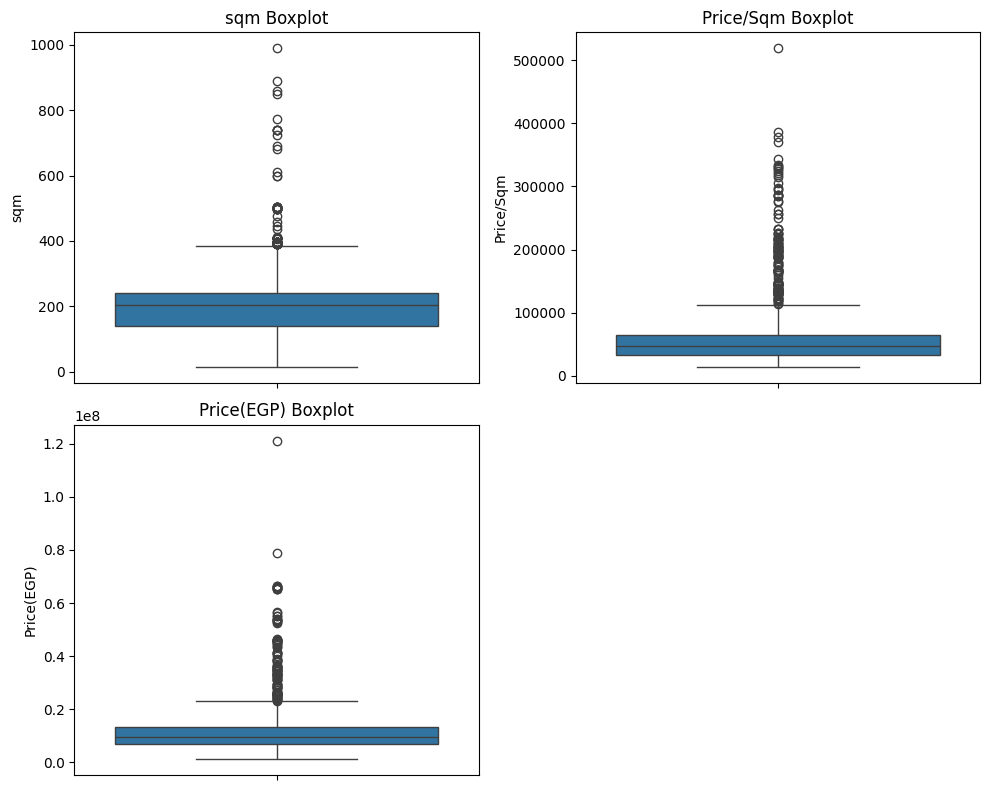

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['sqm','Price/Sqm','Price(EGP)']
def boxplots(cols):
    """Plot boxplots for each column in cols to visualize outliers."""
    fig, (
        (ax1, ax2),
        (ax3, ax4)
    ) = plt.subplots(2,2,figsize=(10,8))

    # exclude ax4 from the chart 
    ax4.remove()

    # Plot the plots 
    for ax, col in zip([ax1,ax2,ax3], cols):
        plot = sns.boxplot(re_df[col], label=f"{col} boxplot", ax=ax)
        plot.set_title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()
    
boxplots(numerical_cols)

I see the many outliers in them, so I will separate them, and do a separated analysis for them

In [239]:
def outliers_dummy(cols):
    """Add boolean columns indicating outliers for each column in cols using the IQR method."""
    for col in cols:
        q1 = re_df[col].quantile(0.25) # Q1
        q3 = re_df[col].quantile(0.75) # Q3
        iqr = q3 - q1 # IQR
        low_lim = q1 - 1.5*iqr # Low bound of limitation
        upper_lim = q3 + 1.5*iqr # upper bound of limitation
        condition = (re_df[col] < low_lim) | (re_df[col] > upper_lim)
        re_df[f"Is {col} outlier"] = condition
        print(f"{condition.sum()} are outliers in {col} column")
outliers_dummy(numerical_cols)

73 are outliers in sqm column
148 are outliers in Price/Sqm column
117 are outliers in Price(EGP) column


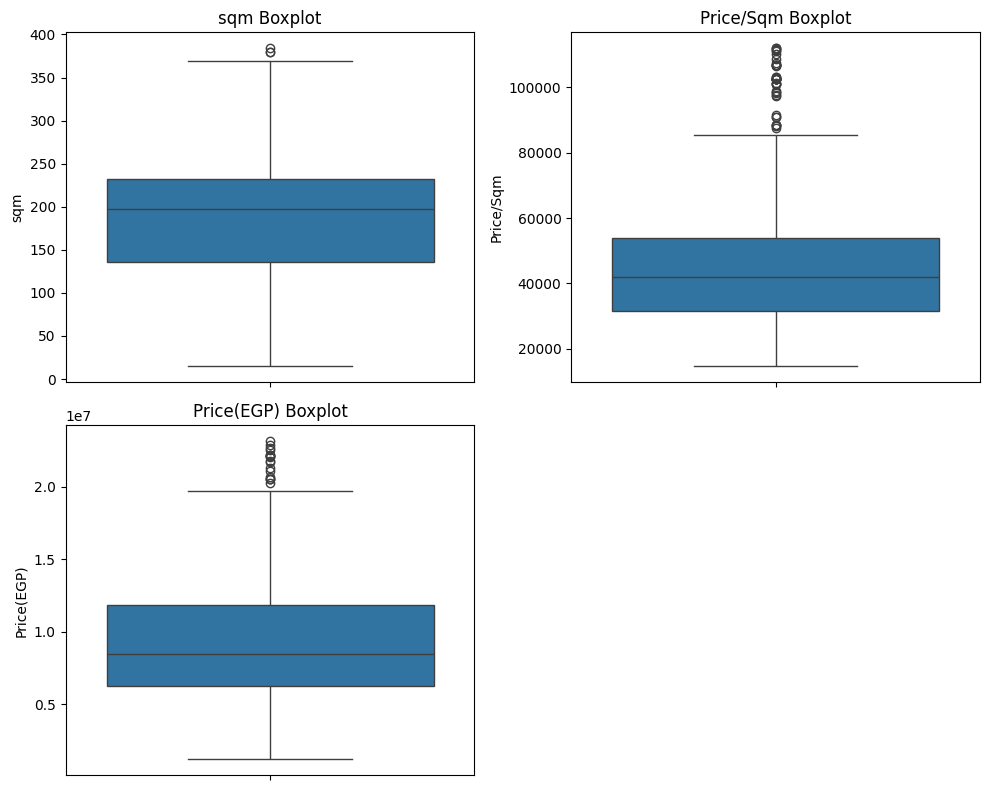

In [240]:
def non_outliers_boxplot(cols:list, outliers_dummies:list):
    """Plot boxplots for non-outlier values of each column in cols, using corresponding dummy columns."""
    # Note: outliers_dummies, and cols list should be the same order(e.g., [price, sqm, etc.], [price_outlier, sqm_outlier])
    fig, (
        (ax1, ax2),
        (ax3, ax4)
    ) = plt.subplots(2,2,figsize=(10,8))
    # exclude ax4 from the chart 
    ax4.remove()
    # Plot the plots 
    for ax, col, outliers_dummies in zip([ax1, ax2, ax3], cols, outliers_dummies):
        # Choose the non_outliers values
        x = re_df.loc[re_df[outliers_dummies] == False][col]
        plot = sns.boxplot(x, label=f"{col} boxplot", ax=ax)
        plot.set_title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()
non_outliers_cols = re_df.iloc[:,-3:].columns # the non_outliers dummies 

non_outliers_boxplot(numerical_cols, non_outliers_cols)

Ok now them outliers are reduced, and handled, the squeeze of the box plot reduced

## Normalizing the continuous data

In [241]:
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor,has_modern,has_facilities,has_green_view,has_water_feature,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_above 3,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_above 2,city_Mansoura,city_Mersa Matruh,city_New Administrative Capital,city_New Cairo,city_North Coast,city_Old Cairo,governorate_Cairo,governorate_Dakahlia,governorate_Matrouh,property_category_Residential,property_subType_Office,property_subType_Others,property_subType_Residential - Attached Houses,property_subType_Retail,Is sqm outlier,Is Price/Sqm outlier,Is Price(EGP) outlier
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False
1,Beachfront Tower - B1,3,above 2,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,True,True,True
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,False,True,False
3,Mazarine Apartment,3,above 2,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,False,False,False
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Alamain (Latin District),3,0,177.47,2025,North Coast,Alexandria,Building A04 Floor G Unit Z05-CL06-A04-M4-00-0...,5678000,Residential,Apartment (Residential - Multi-Story Units),31994.1399,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False
1101,Jade Park,above 3,2,692.00,2025,New Administrative Capital,Cairo,Building 1L Floor 6th floor Unit JP1L61 Jade P...,25292000,Residential,Apartment (Residential - Multi-Story Units),36549.1329,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,True,False,True
1102,Mamsha Avenue,3,0,171.00,2025,New Administrative Capital,Cairo,Building MAA15B Floor 4 Unit MAA15B43 Mamsha A...,6137000,Residential,Apartment (Residential - Multi-Story Units),35888.8889,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,False,False,False
1103,Alamain (Latin District),3,0,207.58,2025,North Coast,Alexandria,Building A06 Floor 4 Unit Z05-CL08-A06-M4-04-0...,5933000,Residential,Apartment (Residential - Multi-Story Units),28581.7516,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False


In [242]:
re_df[numerical_cols]

,sqm,Price/Sqm,Price(EGP)
0,92.86,71010.1228,6594000
1,398.00,166090.4523,66104000
2,93.00,137892.4731,12824000
3,252.00,51019.8413,12857000
4,209.42,41643.5870,8721000
...,...,...,...
1099,177.47,31994.1399,5678000
1101,692.00,36549.1329,25292000
1102,171.00,35888.8889,6137000
1103,207.58,28581.7516,5933000


I think take the log of the price/sqm, and Price

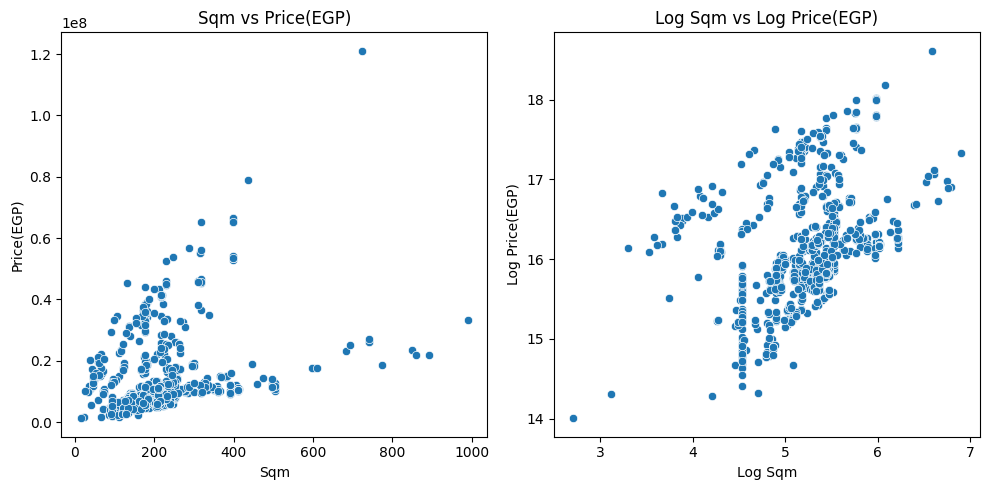

In [243]:
def two_scatters_plot(x:np.ndarray ,y:np.ndarray, x_name:str, y_name:str):
    """Plot two plots to compare them with different data

    Args:
        x (Array): original x values
        y (Array): Original y values
        x_name (str): xlabel 
        y_name (str): ylabel
    Returns:
        Logs: The logs of x, and y
    """
    plt.figure(figsize=(10,5)) # Make two plots one for sqm vs price, and the another sqm vs log(price)
    # sqm vs price
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.title(f"{x_name} vs {y_name}")
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    
    log_x = np.log(x) #take the log of x
    log_y = np.log(y) #take the log of y
    log_x_name = "Log " + x_name # log xlabel
    log_y_name = "Log " + y_name # log ylabel
    #sqm vs log(price)
    plt.subplot(1,2,2)
    sns.scatterplot(x=log_x, y=log_y)
    plt.title(f"{log_x_name} vs {log_y_name}")
    plt.ylabel(log_y_name)
    plt.xlabel(log_x_name)
    plt.tight_layout()
    plt.show()
    return log_x, log_y

# Assign the returned arrays to separate columns
re_df["log(sqm)"], re_df["log(price)"] = two_scatters_plot(re_df["sqm"], re_df["Price(EGP)"], "Sqm", "Price(EGP)")

Logs of them is better, because The large values of price, and sqm make the scatter limited to the left corner only

That's better

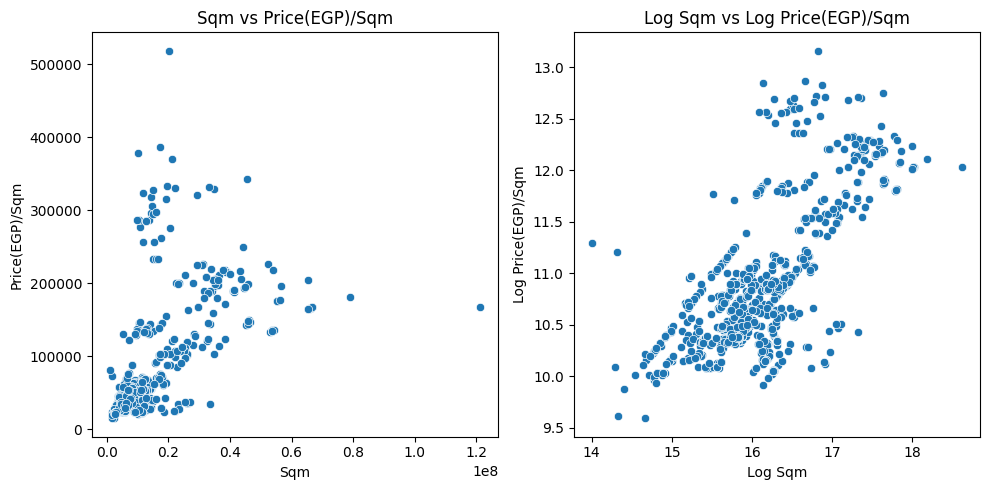

In [244]:
_, re_df["log(price/sqm)"] = two_scatters_plot(re_df["Price(EGP)"],re_df["Price/Sqm"], "Sqm", "Price(EGP)/Sqm")

Logs also better, because the data in the left plot limited in the left corner, but on the other hand the right plot shows a spread linear data

## Final data

In [245]:
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,Price(EGP),property_category,property_subType,Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,HighFloor,LowFloor,MidFloor,has_modern,has_facilities,has_green_view,has_water_feature,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_above 3,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_above 2,city_Mansoura,city_Mersa Matruh,city_New Administrative Capital,city_New Cairo,city_North Coast,city_Old Cairo,governorate_Cairo,governorate_Dakahlia,governorate_Matrouh,property_category_Residential,property_subType_Office,property_subType_Others,property_subType_Residential - Attached Houses,property_subType_Retail,Is sqm outlier,Is Price/Sqm outlier,Is Price(EGP) outlier,log(sqm),log(price),log(price/sqm)
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False,4.531093,15.701671,11.170578
1,Beachfront Tower - B1,3,above 2,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,True,True,True,5.986452,18.006740,12.020288
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,12824000,Commercial,Office,137892.4731,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,False,True,False,4.532599,16.366829,11.834229
3,Mazarine Apartment,3,above 2,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,False,False,False,5.529429,16.369399,10.839970
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False,5.344342,15.981244,10.636903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Alamain (Latin District),3,0,177.47,2025,North Coast,Alexandria,Building A04 Floor G Unit Z05-CL06-A04-M4-00-0...,5678000,Residential,Apartment (Residential - Multi-Story Units),31994.1399,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False,5.178802,15.552110,10.373308
1101,Jade Park,above 3,2,692.00,2025,New Administrative Capital,Cairo,Building 1L Floor 6th floor Unit JP1L61 Jade P...,25292000,Residential,Apartment (Residential - Multi-Story Units),36549.1329,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,True,False,True,6.539586,17.045999,10.506413
1102,Mamsha Avenue,3,0,171.00,2025,New Administrative Capital,Cairo,Building MAA15B Floor 4 Unit MAA15B43 Mamsha A...,6137000,Residential,Apartment (Residential - Multi-Story Units),35888.8889,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,False,False,False,5.141664,15.629847,10.488183
1103,Alamain (Latin District),3,0,207.58,2025,North Coast,Alexandria,Building A06 Floor 4 Unit Z05-CL08-A06-M4-04-0...,5933000,Residential,Apartment (Residential - Multi-Story Units),28581.7516,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,False,False,False,5.335517,15.596041,10.260524


In [246]:
re_df.duplicated().sum()

np.int64(0)

In [247]:
### Save it as a csv file
### Reset the index
re_df.reset_index(drop=True)
re_df.to_csv("processed_real_estate.csv", index=False)

## Summary:
- Removed duplicates
- Handled missing values(No missing values)
- Fixed the price, and features columns formats
- Separated Property category from property sub type, combine the rare unique value in Others value
- Created Price/Sqm column
- Made OHE for every feature in the features column list
- Extracted columns from Address such as Has floor, Floor number
- Extracted some columns from description such as has_pool, has_garden, has_lake, etc.
- Made OHE for city, governorate, property(category, and subtype)
- Handled the outliers of the continuous data
- Take the log of the continuous data because of Large values